In [1]:
%load_ext autoreload
%load_ext autotime

time: 422 µs (started: 2023-07-29 15:51:42 -07:00)


In [2]:
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings('ignore')

time: 897 µs (started: 2023-07-29 15:51:42 -07:00)


In [3]:
import dask.dataframe as dd
import numpy as np
import pandas as pd


time: 1.89 s (started: 2023-07-29 15:51:42 -07:00)


In [4]:
%autoreload 2

from wisio.recorder import RecorderAnalyzer

log_dir = "/p/vast1/iopp/recorder_app_logs/montage_pegasus/nodes-32/_parquet"

recorder_analyzer = RecorderAnalyzer(
    cluster_manager_args=dict(
        force_local=True,
        cluster_settings=dict(
            cores=4,
            dashboard_port=3666,
            local_directory="/var/tmp/dask-recorder",
            log_file="%J.log",
            worker_queue="pdebug"
        )
    ),
    working_dir='.recorder',
    debug=True
) 

recorder_analyzer

time: 3.42 s (started: 2023-07-29 15:51:44 -07:00)


In [5]:
recorder_analyzer.cluster_manager.clients[0]

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:3666/status,
Dashboard: http://127.0.0.1:3666/status,Workers: 4
Total threads: 36,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38129,Workers: 4
Dashboard: http://127.0.0.1:3666/status,Total threads: 36
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:37767,Total threads: 9
Dashboard: http://127.0.0.1:34287/status,Memory: 0 B
Nanny: tcp://127.0.0.1:45275,


time: 46.3 ms (started: 2023-07-29 15:51:48 -07:00)


In [6]:
%autoreload 2

res = recorder_analyzer.analyze_parquet(log_dir=log_dir, checkpoint=False, metrics=['duration', 'bw', 'iops'], cutoff=0.1)

time: 24.6 s (started: 2023-07-29 15:51:48 -07:00)


(<Figure size 500x500 with 1 Axes>, <Axes: >)

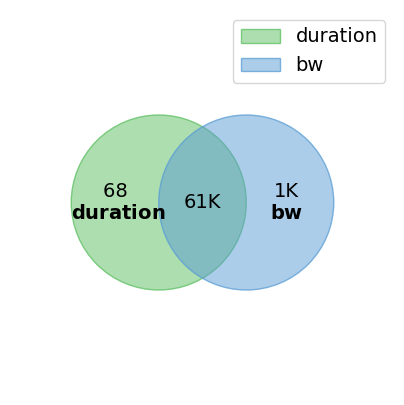

time: 8.75 s (started: 2023-07-29 15:52:14 -07:00)


In [7]:
res.plot.metric_relations2(('time_range',), 'duration', 'bw')

(<Figure size 500x500 with 1 Axes>, <Axes: >)

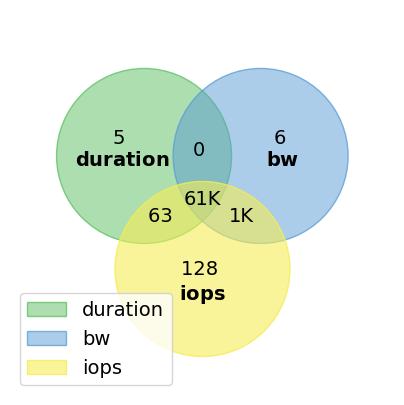

time: 1.28 s (started: 2023-07-29 15:52:23 -07:00)


In [8]:
res.plot.metric_relations3(('time_range',), 'duration', 'bw', 'iops')

(<Figure size 500x500 with 1 Axes>, <Axes: >)

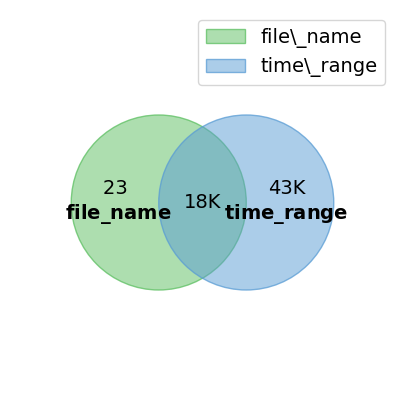

time: 777 ms (started: 2023-07-29 15:52:24 -07:00)


In [9]:
res.plot.view_relations2('duration', ('file_name',), ('time_range',))

(<Figure size 500x500 with 1 Axes>, <Axes: >)

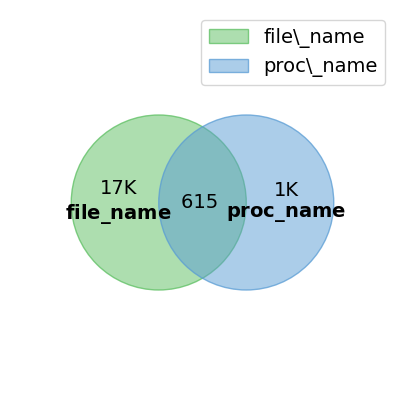

time: 618 ms (started: 2023-07-29 15:52:25 -07:00)


In [10]:
res.plot.view_relations2('duration', ('file_name',), ('proc_name',))

(<Figure size 500x500 with 1 Axes>, <Axes: >)

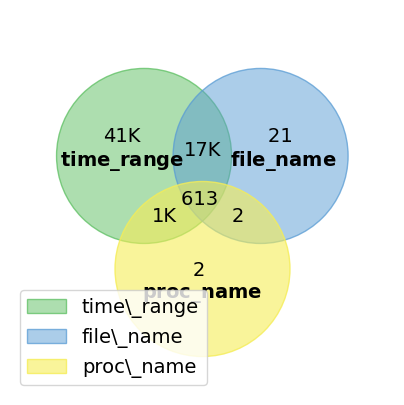

time: 1.03 s (started: 2023-07-29 15:52:25 -07:00)


In [11]:
res.plot.view_relations3('duration', ('time_range',), ('file_name',), ('proc_name',))

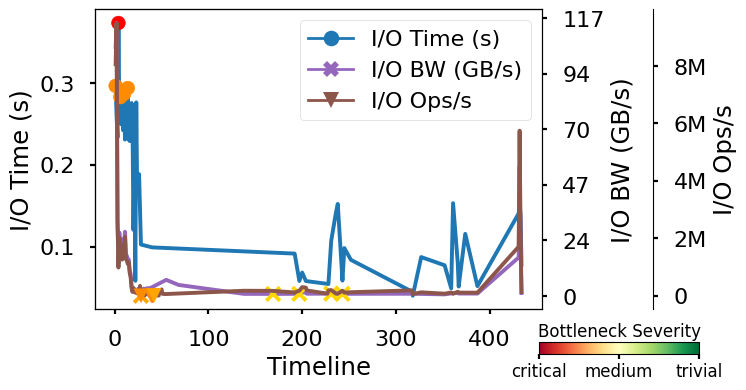

time: 2.72 s (started: 2023-07-29 16:37:21 -07:00)


In [17]:
fig = res.plot.bottleneck_timeline3(
    metric1='duration', 
    metric2='bw', 
    metric3='iops', 
    label1='I/O Time (s)',
    label2='I/O BW (GB/s)',
    label3='I/O Ops/s',
    figsize=(8, 4),
    threshold=0.1,
    sample_count=5,    
)

<Axes: title={'center': 'bw'}, xlabel='time_range', ylabel='bw'>

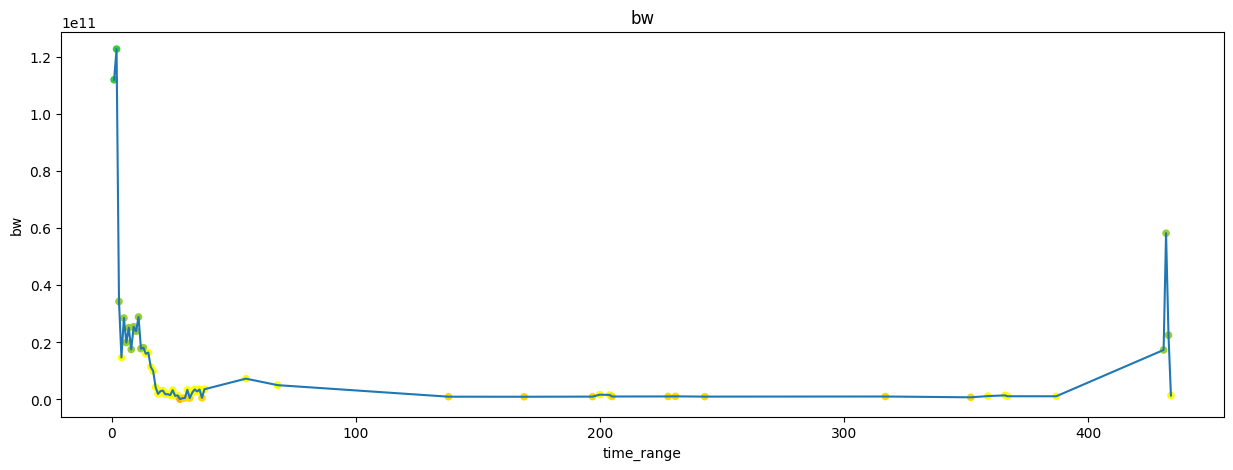

time: 1.03 s (started: 2023-07-29 08:34:28 -07:00)


In [26]:
res.plot.timeline('bw')

<Axes: title={'center': 'iops'}, xlabel='time_range', ylabel='iops'>

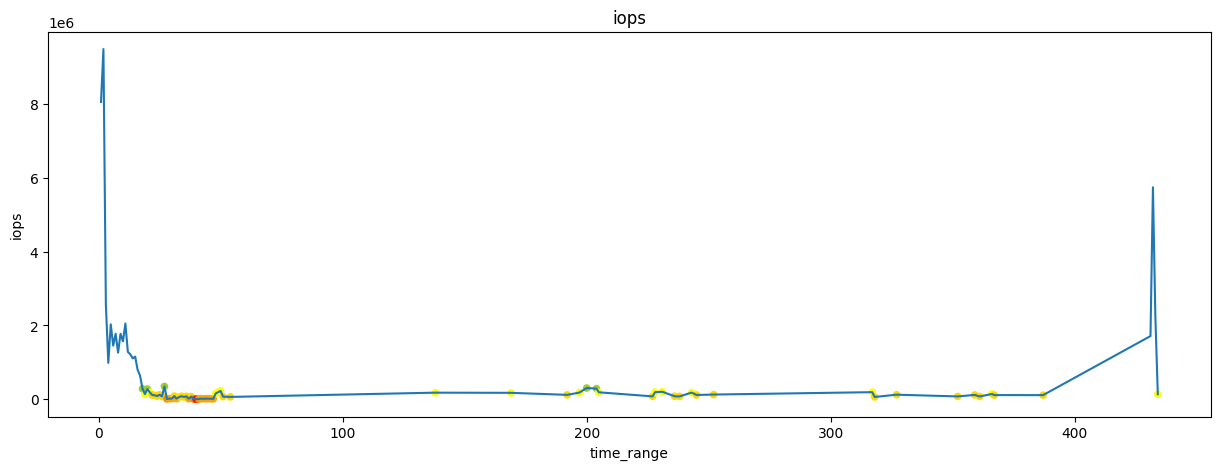

time: 1.08 s (started: 2023-07-29 08:34:35 -07:00)


In [27]:
res.plot.timeline('iops')

In [6]:
from wisio.rules import Rule
from wisio._recorder.rules import RecorderRuleEngine

time: 11 ms (started: 2023-07-05 10:33:55 -07:00)


In [10]:
%%timeit -r 20 -n 1

res = recorder_analyzer.analyze_parquet(log_dir=log_dir, cutoff=0.1, checkpoint=False, persist=True, desired_view_names=['trange'])

main_view, views, bottlenecks = res

rules = dict(
    app_name=[Rule.BOTT_METADATA_ACCESS],
    file_dir=[Rule.BOTT_METADATA_ACCESS],
    file_name=[Rule.BOTT_METADATA_ACCESS],
    file_regex=[Rule.BOTT_METADATA_ACCESS],
    node_name=[Rule.BOTT_METADATA_ACCESS],
    proc_name=[Rule.BOTT_METADATA_ACCESS],
    rank=[Rule.BOTT_METADATA_ACCESS],
    trange=[Rule.BOTT_METADATA_ACCESS],
)

rule_engine = RecorderRuleEngine(rules=rules)

characteristics = rule_engine.process_characteristics(view=main_view)

processed_bottlenecks = rule_engine.process_bottlenecks(bottlenecks=bottlenecks, characteristics=characteristics, threshold=0.1)


14.5 s ± 835 ms per loop (mean ± std. dev. of 20 runs, 1 loop each)
time: 4min 49s (started: 2023-07-05 10:52:44 -07:00)


In [11]:
%%timeit -r 20 -n 1

res = recorder_analyzer.analyze_parquet(log_dir=log_dir, cutoff=0.1, checkpoint=False, persist=False, desired_view_names=['trange'])

main_view, views, bottlenecks = res

rules = dict(
    app_name=[Rule.BOTT_METADATA_ACCESS],
    file_dir=[Rule.BOTT_METADATA_ACCESS],
    file_name=[Rule.BOTT_METADATA_ACCESS],
    file_regex=[Rule.BOTT_METADATA_ACCESS],
    node_name=[Rule.BOTT_METADATA_ACCESS],
    proc_name=[Rule.BOTT_METADATA_ACCESS],
    rank=[Rule.BOTT_METADATA_ACCESS],
    trange=[Rule.BOTT_METADATA_ACCESS],
)

rule_engine = RecorderRuleEngine(rules=rules)

characteristics = rule_engine.process_characteristics(view=main_view)

processed_bottlenecks = rule_engine.process_bottlenecks(bottlenecks=bottlenecks, characteristics=characteristics, threshold=0.1)


ValueError: Metadata inference failed in `set_tranges`.

You have supplied a custom function and Dask is unable to 
determine the type of output that that function returns. 

To resolve this please provide a meta= keyword.
The docstring of the Dask function you ran should have more information.

Original error is below:
------------------------
CancelledError()

Traceback:
---------
  File "/usr/WS2/iopp/projects/vani-analysis-tool/virenv-lassen/lib/python3.7/site-packages/dask/dataframe/utils.py", line 177, in raise_on_meta_error
    yield
  File "/usr/WS2/iopp/projects/vani-analysis-tool/virenv-lassen/lib/python3.7/site-packages/dask/dataframe/core.py", line 6001, in _emulate
    return func(*_extract_meta(args, True), **_extract_meta(kwargs, True))
  File "../wisio/_recorder/analysis.py", line 243, in set_tranges
    tranges = tranges.result() if isinstance(tranges, Future) else tranges
  File "/usr/WS2/iopp/projects/vani-analysis-tool/virenv-lassen/lib/python3.7/site-packages/distributed/client.py", line 272, in result
    result = self.client.sync(self._result, callback_timeout=timeout, raiseit=False)
  File "/usr/WS2/iopp/projects/vani-analysis-tool/virenv-lassen/lib/python3.7/site-packages/distributed/utils.py", line 310, in sync
    self.loop, func, *args, callback_timeout=callback_timeout, **kwargs
  File "/usr/WS2/iopp/projects/vani-analysis-tool/virenv-lassen/lib/python3.7/site-packages/distributed/utils.py", line 376, in sync
    raise exc.with_traceback(tb)
  File "/usr/WS2/iopp/projects/vani-analysis-tool/virenv-lassen/lib/python3.7/site-packages/distributed/utils.py", line 349, in f
    result = yield future
  File "/usr/WS2/iopp/projects/vani-analysis-tool/virenv-lassen/lib/python3.7/site-packages/tornado/gen.py", line 769, in run
    value = future.result()


time: 8min 2s (started: 2023-07-05 10:57:35 -07:00)


In [ ]:
%%timeit -r 10 -n 1

res = recorder_analyzer.analyze_parquet(log_dir=log_dir, checkpoint=False, cutoff=0.1, desired_view_names=['trange'])

main_view, views, bottlenecks = res

rules = dict(
    app_name=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    file_dir=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    file_name=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    file_regex=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    node_name=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    proc_name=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    rank=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    trange=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
)

rule_engine = RecorderRuleEngine(rules=rules)

characteristics = rule_engine.process_characteristics(view=main_view)

processed_bottlenecks = rule_engine.process_bottlenecks(bottlenecks=bottlenecks, characteristics=characteristics, threshold=0.1)


In [7]:
main_view, views, bottlenecks = res

time: 825 µs (started: 2023-03-29 22:40:23 -07:00)


In [8]:
%autoreload 2

from wisio.rules import Rule
from wisio._recorder.rules import RecorderRuleEngine

rules = dict(
    file_name=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    proc_name=[Rule.BOTT_METADATA_ACCESS],
    trange=[],
)

rule_engine = RecorderRuleEngine(rules=rules)


time: 39.6 ms (started: 2023-03-29 22:40:30 -07:00)


In [9]:
%autoreload 2

characteristics = rule_engine.process_characteristics(view=main_view)
characteristics


{<Rule.CHAR_IO_TIME: 118>: RuleResult(data_dict=None, description='I/O Time', detail_list=None, reasons=None, rule=<Rule.CHAR_IO_TIME: 118>, value=8.474973793299455, value_fmt='8.47 seconds'),
 <Rule.CHAR_IO_SIZE: 116>: RuleResult(data_dict=None, description='Total Size', detail_list=None, reasons=None, rule=<Rule.CHAR_IO_SIZE: 116>, value=61944504790, value_fmt='57.69 GB'),
 <Rule.CHAR_READ_IO_SIZE: 125>: RuleResult(data_dict=None, description='Read Size', detail_list=None, reasons=None, rule=<Rule.CHAR_READ_IO_SIZE: 125>, value=34335376652, value_fmt='31.98 GB (55.43%)'),
 <Rule.CHAR_WRITE_IO_SIZE: 130>: RuleResult(data_dict=None, description='Write Size', detail_list=None, reasons=None, rule=<Rule.CHAR_WRITE_IO_SIZE: 130>, value=27608092484, value_fmt='25.71 GB (44.57%)'),
 <Rule.CHAR_READ_XFER_SIZE: 132>: RuleResult(data_dict=None, description='Read Xfer', detail_list=['<4 KB - 3,151 ops (73.88%)', '4-16 KB - 66 ops (1.55%)', '16-64 KB - 1,017 ops (23.85%)', '64-256 KB - 31 ops (0.

time: 391 ms (started: 2023-03-29 22:40:31 -07:00)


In [10]:
from rich.console import Console
from rich.panel import Panel
from rich.table import Table
from rich.tree import Tree

# Create a new Table object from Rich library
table = Table(box=None, show_header=False)

# Add columns to the table for the key and value
table.add_column(style="cyan")
table.add_column()

# Add each key-value pair to the table as a row
for rule, result in characteristics.items():
    if result.detail_list is None:
        table.add_row(result.description, result.value_fmt)
    else:
        detail_tree = Tree(result.value_fmt)
        for detail in result.detail_list:
            detail_tree.add(detail)
        table.add_row(result.description, detail_tree)

# Create a Console object from Rich library
console = Console()

# Print the table with Rich formatting
console.print(Panel(table, title='Summary'))


╭──────────────────────────────────────────────────── Summary ────────────────────────────────────────────────────╮
│  I/O Time          8.47 seconds                                                                                 │
│  Total Size        57.69 GB                                                                                     │
│  Read Size         31.98 GB (55.43%)                                                                            │
│  Write Size        25.71 GB (44.57%)                                                                            │
│  Read Xfer         4 KB-256 KB - 4,265 ops                                                                      │
│                    ├── <4 KB - 3,151 ops (73.88%)                                                               │
│                    ├── 4-16 KB - 66 ops (1.55%)                                                                 │
│                    ├── 16-64 KB - 1,017 ops (23.85%)                                                            │
│                    └── 64-256 KB - 31 ops (0.73%)                                                               │
│  Write Xfer        4 KB-16 MB - 1,215 ops                                                                       │
│                    ├── <4 KB - 1,088 ops (89.55%)                                                               │
│                    ├── 4-16 KB - 64 ops (5.27%)                                                                 │
│                    ├── 16-64 KB - 22 ops (1.81%)                                                                │
│                    ├── 64-256 KB - 10 ops (0.82%)                                                               │
│                    ├── 1-4 MB - 18 ops (1.48%)                                                                  │
│                    └── 4-16 MB - 13 ops (1.07%)                                                                 │
│  Total I/O Ops     6,985,234 ops                                                                                │
│  Read I/O Ops      4,386,801 ops (62.80%)                                                                       │
│  Write I/O Ops     2,515,850 ops (36.02%)                                                                       │
│  Metadata I/O Ops  82,583 ops (1.18%)                                                                           │
│  Apps              5 apps                                                                                       │
│                    ├── mAddMPI - 8.47 s (100.00%) - 3.03/21.47 GB R/W (5.25/37.21%) - 2,133,274 ops (30.54%)    │
│                    ├── mViewer - 3.59 s (42.31%) - 26.25/0.12 GB R/W (45.51/0.20%) - 3,156,825 ops (45.19%)     │
│                    ├── mProjExec - 0.29 s (3.48%) - 2.09/4.13 GB R/W (3.62/7.15%) - 1,636,067 ops (23.42%)      │
│                    ├── mImgtbl - 0.04 s (0.43%) - 0.61/0.00 GB R/W (1.05/0.00%) - 58,312 ops (0.83%)            │
│                    └── mMakeHdr - 0.00 s (0.06%) - 0.00/0.00 GB R/W (0.00/0.00%) - 756 ops (0.01%)              │
│  Nodes             32 nodes                                                                                     │
│                    ├── lassen578 - 8.47 s (100.00%) - 0.53/1.52 GB R/W (0.93/2.64%) - 298,908 ops (4.28%)       │
│                    ├── lassen246 - 8.39 s (99.05%) - 0.38/8.11 GB R/W (0.66/14.05%) - 320,050 ops (4.58%)       │
│                    ├── lassen576 - 4.99 s (58.85%) - 0.48/4.95 GB R/W (0.83/8.59%) - 227,236 ops (3.25%)        │
│                    ├── lassen528 - 3.59 s (42.31%) - 2.74/0.46 GB R/W (4.75/0.80%) - 291,560 ops (4.17%)        │
│                    ├── lassen503 - 3.32 s (39.17%) - 0.47/0.59 GB R/W (0.81/1.02%) - 228,451 ops (3.27%)        │
│                    ├── lassen355 - 2.81 s (33.12%) - 8.99/0.40 GB R/W (15.58/0.70%) - 197,353 ops (2.83%)       │
│                    ├── lassen364 - 2.33 s (27.50%) - 0

time: 180 ms (started: 2023-03-29 22:40:32 -07:00)


In [14]:
%autoreload 2

processed_bottlenecks = rule_engine.process_bottlenecks(bottlenecks=bottlenecks, characteristics=characteristics, threshold=0.1)
processed_bottlenecks

{('file_name',): {<Rule.BOTT_METADATA_ACCESS: 207>: {},
  <Rule.BOTT_SMALL_READS: 211>: {'/p/gpfs1/iopp/temp/montage/2854964/0/run/ngc3372.fits': RuleResult(data_dict={'duration_sum': 0.9441815895092986, 'index_count': 61931, 'size_min': 0, 'size_max': 49032, 'size_sum': 2675395157, 'read_time': 0.9438897895101945, 'write_time': 0.8715055981159026, 'metadata_time': 0.03352300017149901, 'read_size': 2100691156, 'write_size': 574704001, 'metadata_size': 0, 'read_count': 48551, 'write_count': 13299, 'metadata_count': 81, 'read_min': 435602, 'read_max': 478872, 'write_min': 5761, 'write_max': 89424, 'metadata_min': 0, 'metadata_max': 0, 'data_count': 61850, 'data_size': 2675395157, 'data_time': 0.9438897895101945, 'sequential_time': 0.9438897895101945, 'random_time': 0.0, 'sequential_size': 2675395157, 'random_size': 0, 'sequential_count': 61850, 'random_count': 0, 'close_time': 0.0033388000015293073, 'open_time': 0.0301182001712732, 'seek_time': 0.0, 'stat_time': 0.0, 'close_count': 39, '

time: 3.67 s (started: 2023-03-29 22:19:08 -07:00)


In [33]:
processed_bottlenecks[('file_name',)][Rule.BOTT_SMALL_WRITES]

{'/p/gpfs1/iopp/temp/montage/2854964/0/run/ngc3372.fits': RuleResult(data_dict={'duration_sum': 0.9441815895092986, 'index_count': 61931, 'size_min': 0, 'size_max': 49032, 'size_sum': 2675395157, 'read_time': 0.9438897895101945, 'write_time': 0.8715055981159026, 'metadata_time': 0.03352300017149901, 'read_size': 2100691156, 'write_size': 574704001, 'metadata_size': 0, 'read_count': 48551, 'write_count': 13299, 'metadata_count': 81, 'read_min': 435602, 'read_max': 478872, 'write_min': 5761, 'write_max': 89424, 'metadata_min': 0, 'metadata_max': 0, 'data_count': 61850, 'data_size': 2675395157, 'data_time': 0.9438897895101945, 'sequential_time': 0.9438897895101945, 'random_time': 0.0, 'sequential_size': 2675395157, 'random_size': 0, 'sequential_count': 61850, 'random_count': 0, 'close_time': 0.0033388000015293073, 'open_time': 0.0301182001712732, 'seek_time': 0.0, 'stat_time': 0.0, 'close_count': 39, 'open_count': 40, 'seek_count': 0, 'stat_count': 0, 'duration_pero': 0.11140820166969653,

time: 8.99 ms (started: 2023-03-29 18:39:25 -07:00)


In [8]:
!rm -rf {log_dir}/bottlenecks

time: 343 ms (started: 2023-03-12 17:52:39 -07:00)


In [9]:
recorder_analyzer.save_bottlenecks(log_dir=log_dir, bottlenecks=bottlenecks)


time: 7.35 s (started: 2023-03-12 17:52:39 -07:00)


In [10]:
!chmod g+r {log_dir}/bottlenecks/*
!ls -lh {log_dir}/bottlenecks

total 27M
-rw-r--r-- 1 izzet iopp 2.5M Mar 12 17:52 file_name.json
-rw-r--r-- 1 izzet iopp 1.5M Mar 12 17:52 file_name_proc_name.json
-rw-r--r-- 1 izzet iopp 1.4M Mar 12 17:52 file_name_proc_name_trange.json
-rw-r--r-- 1 izzet iopp 1.4M Mar 12 17:52 file_name_trange.json
-rw-r--r-- 1 izzet iopp 1.5M Mar 12 17:52 file_name_trange_proc_name.json
-rw-r--r-- 1 izzet iopp 1.5M Mar 12 17:52 proc_name.json
-rw-r--r-- 1 izzet iopp 2.5M Mar 12 17:52 proc_name_file_name.json
-rw-r--r-- 1 izzet iopp 1.4M Mar 12 17:52 proc_name_file_name_trange.json
-rw-r--r-- 1 izzet iopp 1.4M Mar 12 17:52 proc_name_trange.json
-rw-r--r-- 1 izzet iopp 2.5M Mar 12 17:52 proc_name_trange_file_name.json
-rw-r--r-- 1 izzet iopp 1.4M Mar 12 17:52 trange.json
-rw-r--r-- 1 izzet iopp 2.5M Mar 12 17:52 trange_file_name.json
-rw-r--r-- 1 izzet iopp 1.5M Mar 12 17:52 trange_file_name_proc_name.json
-rw-r--r-- 1 izzet iopp 1.5M Mar 12 17:52 trange_proc_name.json
-rw-r--r-- 1 izzet iopp 2.5M Mar 12 17:52 trange_proc_name_fil